In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

num_topics = 17
df = pd.read_csv(f"~/Desktop/dm_project/data/stm_data/values/beta/con{num_topics}_beta.csv")

root = os.path.expanduser('~')

# display(df.head())
# print(df.shape)

In [2]:
topic_word_distr = []
imp_words = []
imp_word_prob = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    word_prob = [np.round(vals[i], 2) for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    imp_word_prob.append(word_prob)
    
# print(len(topic_word_distr))
# print(len(imp_words))

# print(imp_words)
# print(imp_word_prob)

# Next Method

Text(0.5, 1.05, 'Term Probability')

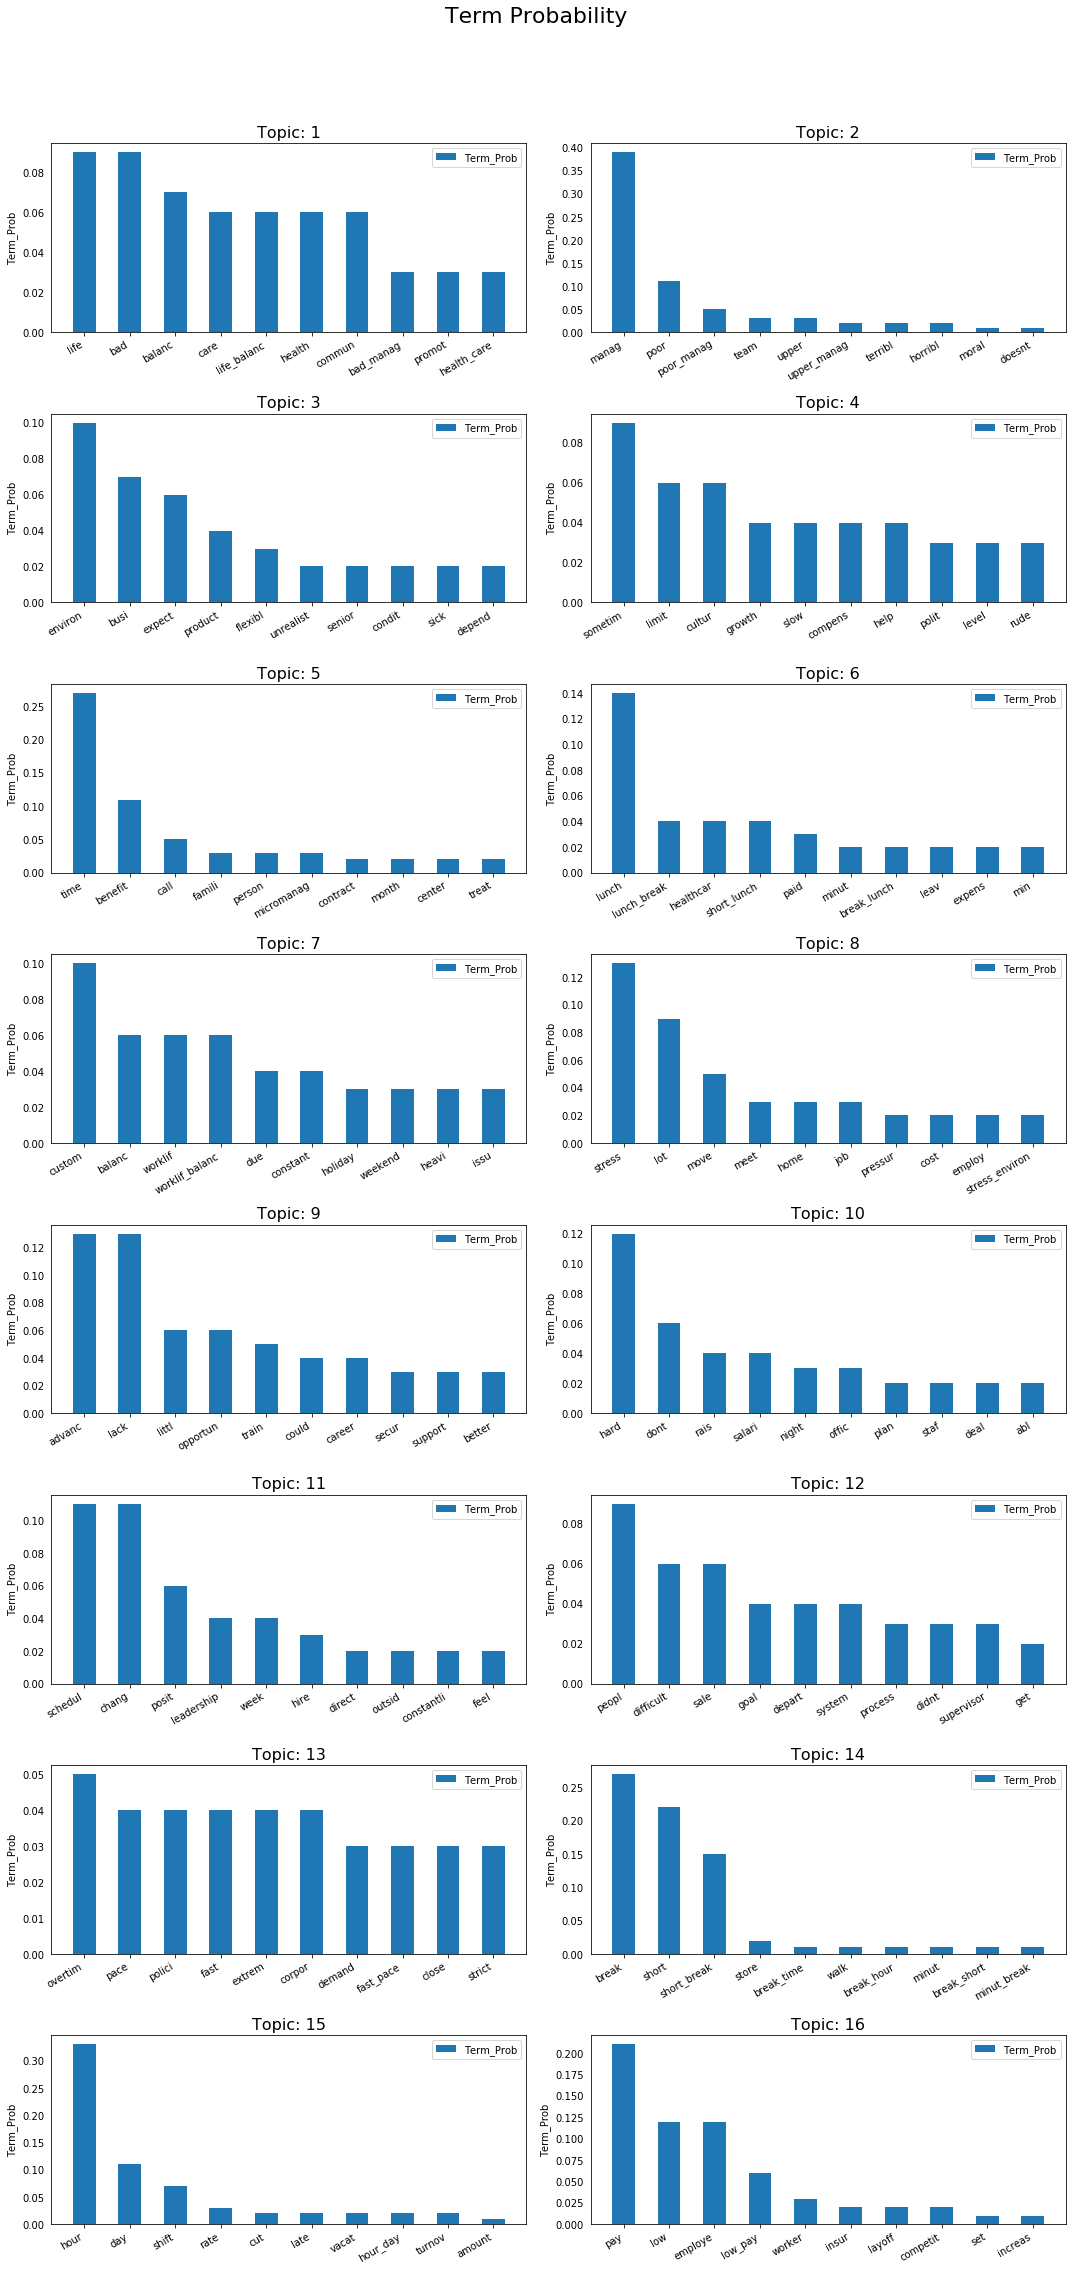

In [3]:
# from collections import Counter

# topics = optimal_model.show_topics(formatted=False, num_topics=num_topics)
# data_flat = [w for w_list in data_px for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])   
# print(df.topic_id.unique())
# display(df.head())

# Plot Word Count and Weights of Topic Keywords

import matplotlib.colors as mcolors

fig, axes = plt.subplots(int(num_topics/2), 2, figsize=(15,30))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# print(cols)
for i, ax in enumerate(axes.flatten()):
#     if (i==15): 
#         break
#     print(i)
    ax.bar(imp_words[i], imp_word_prob[i], color=cols[0], width=0.5, label='Term_Prob')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[0], width=0.2, label='Weights')
    ax.set_ylabel('Term_Prob', color='black')
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i+1), color='black', fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(imp_words[i], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper right')
#     ax_twin.legend(loc='upper right')

# fig.delaxes(ax)
fig.tight_layout(w_pad=2)    
fig.suptitle('Term Probability', fontsize=22, y=1.05)  

# img_path = root + '/Desktop/workspace/indeed/Job-Satisfaction/img/topics_kw/pros'
# img_flag = True

# if not os.path.exists(img_path):
#     os.makedirs(img_path)
    
# if img_flag:
#     plt.savefig(img_path+'/1-50_pros_600iter_10topics.png')
# plt.savefig(root+'/Desktop/paper_fig/stm/con/16/top-ten-words.png')
# plt.show()

# Bokeh Plot

In [5]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, save
import os
import math

fs = []
for i in range(num_topics):
    df_ = pd.DataFrame()
    df_["x"] = imp_words[i]
    df_["top"] = imp_word_prob[i]
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
    p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i+1}",
           toolbar_location=None, tools="hover")
    p.vbar(x='x', top= 'top', width=0.8, source=source)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)

root = os.path.expanduser("~")
show(gridplot(fs, ncols=2))
# export_png(p, filename= root + "/Desktop/test.png")
# output_file("test.html")



Loading BokehJS ...

# Stacked Bar Chart

In [6]:
df = pd.DataFrame()
for i in range(num_topics):
    df.insert(i, f"{i+1}", np.round(np.asarray(imp_word_prob[i]), 2), True) 
# df.append(df.sum(numeric_only=True), ignore_index=True)
remain = 1-df.sum().to_numpy()
print(remain)
df.loc[len(df)] = remain
df = df.T
# df

[0.42 0.31 0.6  0.54 0.4  0.61 0.52 0.56 0.4  0.6  0.53 0.56 0.63 0.28
 0.35 0.38 0.5 ]


In [7]:
# print(imp_words)
# for words_list in imp_words:
#     words_list.append("others")
imp_words1 = []

for words in imp_words: 
    words.append("others")
#     print(words)
    imp_words1.append(words)
# imp_words1

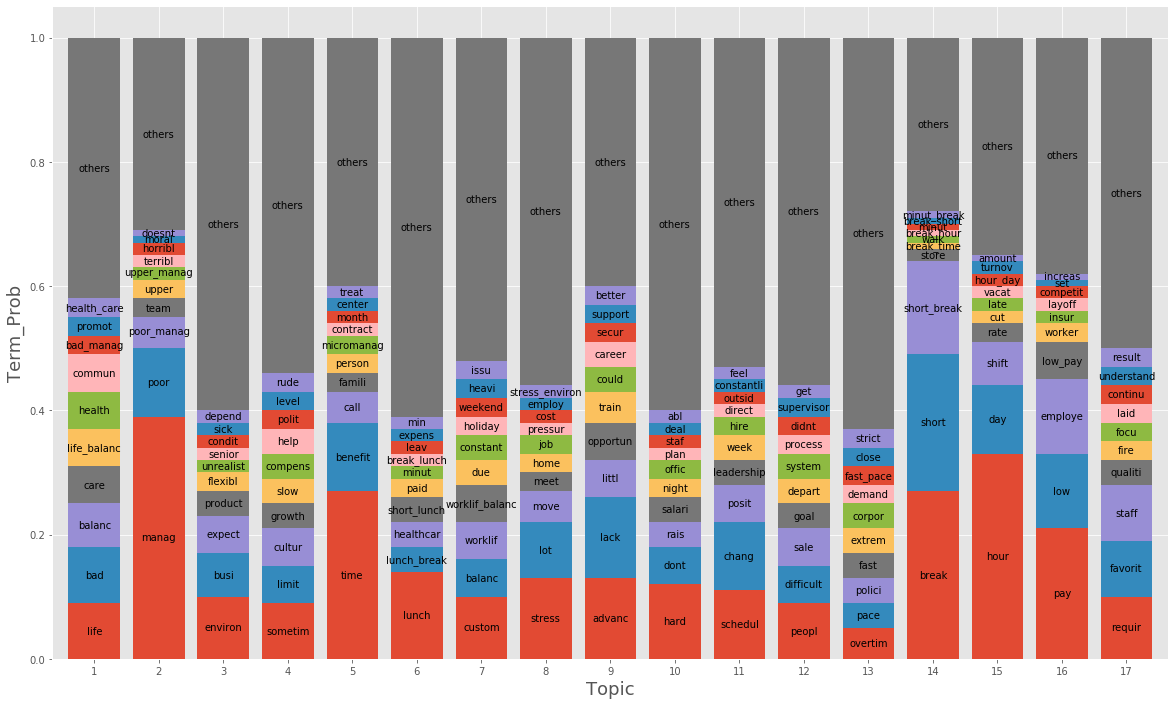

In [8]:
plt.style.use('ggplot')

ax = df.plot(stacked=True, kind='bar', figsize=(20, 12), rot='horizontal', width=.8)

# .patches is everything inside of the chart
i = 0
j = 0
for rect in ax.patches:
#     print(rect)
    # Find where everything is located
#     words = imp_words[i]
#     i += 1
    
    height = round(rect.get_height(), 2)
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the data value and can used as the label
#     label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    label_text = f'{imp_words[i][j]}'
    i += 1
    if(i == num_topics): 
        i = 0
        j += 1
#     print(i, j)
    
    # ax.text(x, y, text)
    label_x = x + width - width/2 # adjust 0.2 to center the label
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
ax.get_legend().remove()
ax.set_ylabel("Term_Prob", fontsize=18)
ax.set_xlabel("Topic", fontsize=18)


# plt.savefig(root+'/Desktop/paper_fig/stm/con/17/top-ten-words1.png')
plt.show()